# Metoda bisekcji
Napisz funkcję realizującą metodę bisekcji dla danej funkcji f w oparciu o arytmetykę o
zmiennej precyzji. Funkcja przyjmuje następujące argumenty:
- Minimalną precyzję obliczeń (liczba cyfr znaczących)
- Krańce przedziału
- Błąd bezwzględny obliczeń

Funkcja ma zwracać wyznaczone miejsce zerowe i liczbę iteracji potrzebną do uzyskania
określonej dokładności. Przetestuj działanie metody dla funkcji podanych na początku
instrukcji. Jaka liczba iteracji jest potrzebna do uzyskania bezwzględnej dokładności
rzędu: 10^-7^, 10^−15^ , 10^−33^ ? W jaki sposób możemy obliczyć k pierwszych dodatnich
pierwiastków funkcji f1(x)?

In [108]:
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt

In [109]:
def f1(x):
    return mp.cos(x) * mp.cosh(x) - 1
def f2(x):
    return (1 / x) - mp.tan(x)
def f3(x):
    return 2 ** (-x) + mp.exp(x) + 2 * mp.cos(x) - 6

def f1_np(x):
    return np.cos(x) * np.cosh(x) - 1
def f2_np(x):
    return (1 / x) - np.tan(x)
def f3_np(x):
    return 2 ** (-x) + np.exp(x) + 2 * np.cos(x) - 6

def f1_prime(x):
    return mp.cos(x) * mp.sinh(x) - mp.sin(x) * mp.cosh(x)
def f2_prime(x):
    return -1 / (x ** 2) - mp.sec(x) ** 2
def f3_prime(x):
    return -mp.ln(2) * 2 ** (-x) + mp.exp(x) - 2 * mp.sin(x)

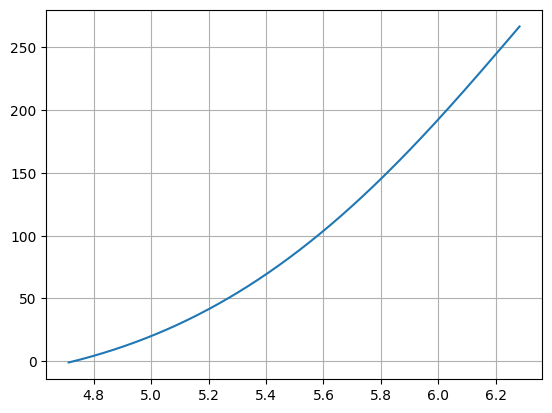

In [110]:
x = np.linspace(3/2 * np.pi, 2 * np.pi, 1000)
plt.plot(x, f1_np(x))
plt.grid()
plt.show()

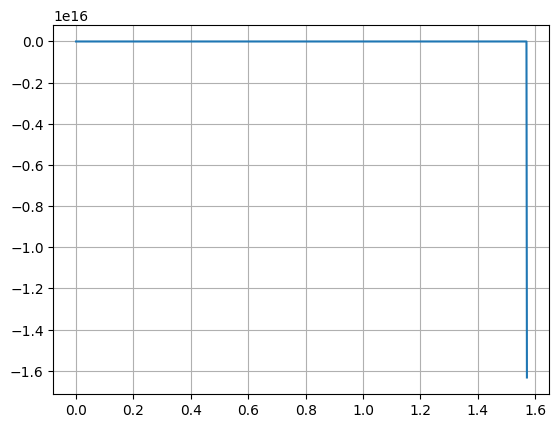

In [111]:
x = np.linspace(0.0001, np.pi/2, 1000)
plt.plot(x, f2_np(x))
plt.grid()
plt.show()

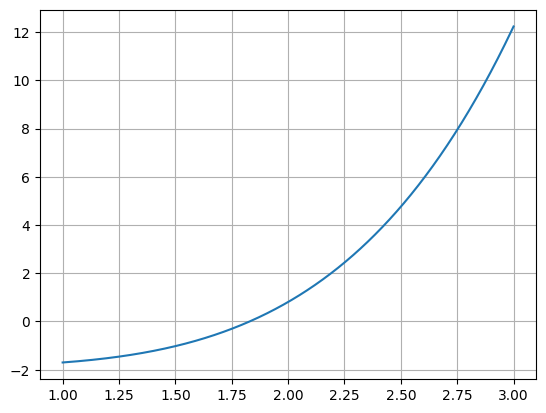

In [112]:
x = np.linspace(1, 3, 1000)
plt.plot(x, f3_np(x))
plt.grid()
plt.show()

In [113]:
def bisection(f, a, b, prec, error):
    mp.mp.dps = prec
    a = mp.mpf(a)
    b = mp.mpf(b)
    error = mp.mpf(error)
    n = mp.ceil((mp.log(b - a) - mp.log(error)) / mp.log(2))
    i = 0
    while i < n:
        i += 1
        c = a + ((b - a) / 2)
        if abs(b - a) < error:
            return c, i
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, i



In [114]:
print(bisection(f1, 3/2 * np.pi, 2 * np.pi, 10, 10**-7))
print(bisection(f1, 3/2 * np.pi, 2 * np.pi, 10, 10**-15))
print(bisection(f1, 3/2 * np.pi, 2 * np.pi, 10, 10**-33))


(mpf('4.730040713795'), 24)
(mpf('4.730040744878'), 51)
(mpf('4.730040744878'), 111)


In [115]:
print(bisection(f2, 0.0001, np.pi/2, 10, 10**-7))
print(bisection(f2, 0.0001, np.pi/2, 10, 10**-15))
print(bisection(f2, 0.0001, np.pi/2, 10, 10**-33))

(mpf('0.860333659788'), 24)
(mpf('0.860333589022'), 51)
(mpf('0.860333589022'), 111)


In [116]:
print(bisection(f3, 1, 3, 10, 10**-7))
print(bisection(f3, 1, 3, 10, 10**-15))
print(bisection(f3, 1, 3, 10, 10**-33))

(mpf('1.829383552074'), 25)
(mpf('1.829383601958'), 39)
(mpf('1.829383601958'), 39)


# Metoda Newtona
Napisz funkcję realizującą metodę Newtona w oparciu o arytmetykę o zmiennej precyzji.
Funkcja ma wykorzystywać dwa kryteria stopu:
• maksymalną liczbę iteracji
• moduł różnicy kolejnych przybliżeń mniejszy od danej wartości ε
Oprócz przybliżonej wartości pierwiastka funkcja ma zwrócić liczbę iteracji potrzebną
do uzyskania określonej dokładności ε. Przetestuj działanie metody dla funkcji podanych
na początku instrukcji (dodatkowo dostępne pochodne tych funkcji). Porównaj zbieżność
metody ze zbieżnością uzyskaną dla metody bisekcji.

In [117]:
def newton(f, f_prime, x0, prec, error):
    mp.mp.dps = prec
    x0 = mp.mpf(x0)
    error = mp.mpf(error)
    i = 0
    while i < 30:
        i += 1
        x1 = x0 - f(x0) / f_prime(x0)
        if abs(x1 - x0) < error:
            return x1, i
        x0 = x1
    return x1, i

In [118]:
print(newton(f1, f1_prime, 3/2 * np.pi, 10, 10**-7))
print(newton(f1, f1_prime, 3/2 * np.pi, 10, 10**-15))
print(newton(f1, f1_prime, 3/2 * np.pi, 10, 10**-33))

(mpf('4.730040744878'), 3)
(mpf('4.730040744878'), 4)
(mpf('4.730040744878'), 4)


In [119]:
print(newton(f2, f2_prime, 0.0001, 10, 10**-7))
print(newton(f2, f2_prime, 0.0001, 10, 10**-15))
print(newton(f2, f2_prime, 0.0001, 10, 10**-33))

(mpf('0.860333589022'), 17)
(mpf('0.8603335890148'), 30)
(mpf('0.8603335890148'), 30)


In [120]:
print(newton(f3, f3_prime, 1, 10, 10**-7))
print(newton(f3, f3_prime, 1, 10, 10**-15))
print(newton(f3, f3_prime, 1, 10, 10**-33))

(mpf('1.829383601929'), 8)
(mpf('1.829383601944'), 10)
(mpf('1.829383601944'), 10)


# Metoda siecznych
Napisz funkcję realizującą metodę siecznych w oparciu o arytmetykę o zmiennej precyzji.
Funkcja powinna stosować te same kryteria stopu co funkcja realizująca metodę Newto-
na. Przetestuj działanie metody dla funkcji podanych na początku instrukcji. Porównaj
zbieżność metody ze zbieżnością uzyskaną dla metody bisekcji oraz metody Newtona

In [121]:
def secant(f, x0, x1, prec, error):
    mp.mp.dps = prec
    x0 = mp.mpf(x0)
    x1 = mp.mpf(x1)
    error = mp.mpf(error)
    i = 0
    while i < 30:
        i += 1
        x2 = x1 - f(x1) * ((x1 - x0) / (f(x1) - f(x0)))
        if abs(x2 - x1) < error:
            return x2, i
        x0 = x1
        x1 = x2
    return x2, i

In [122]:
print(secant(f1, 3/2 * np.pi, 2 * np.pi, 10, 10**-7))
print(secant(f1, 3/2 * np.pi, 2 * np.pi, 10, 10**-15))
print(secant(f1, 3/2 * np.pi, 2 * np.pi, 10, 10**-33))

(mpf('4.730040744878'), 6)
(mpf('4.730040744878'), 7)
(mpf('4.730040744878'), 7)


In [123]:
print(secant(f2, 0.0001, np.pi/2, 10, 10**-7))
print(secant(f2, 0.0001, np.pi/2, 10, 10**-15))
print(secant(f2, 0.0001, np.pi/2, 10, 10**-33))

(mpf('0.0001000805160425'), 2)
(mpf('0.860333589022'), 27)
(mpf('0.860333589022'), 27)


In [124]:
print(secant(f3, 1, 3, 10, 10**-7))
print(secant(f3, 1, 3, 10, 10**-15))
print(secant(f3, 1, 3, 10, 10**-33))

(mpf('1.829383601944'), 10)
(mpf('1.829383601944'), 11)
(mpf('1.829383601944'), 11)
